In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os


In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [4]:
dataset_path = r"C:\Users\W10\Desktop\Yeni klasör\flower_photos"

In [5]:
# Set the path for the train and test folders
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")

# Create train and test folders if they don't exist
if not os.path.exists(train_path):
    os.makedirs(train_path)

if not os.path.exists(test_path):
    os.makedirs(test_path)

# Loop through each category in the dataset
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    # Check if the category_path is a directory
    if os.path.isdir(category_path):
        # Get the image files in the category
        category_images = [file for file in os.listdir(category_path) if file.endswith(".jpg")]
        
        # Check if there are sufficient images for splitting
        if len(category_images) < 2:
            continue
        
        # Split the images into train and test sets
        train_images, test_images = train_test_split(category_images, test_size=0.2)

        # Create subfolders in the train and test folders for the current category
        train_category_path = os.path.join(train_path, category)
        test_category_path = os.path.join(test_path, category)
        os.makedirs(train_category_path, exist_ok=True)
        os.makedirs(test_category_path, exist_ok=True)

        # Move the images to their respective folders
        for image in train_images:
            shutil.copy2(os.path.join(category_path, image), os.path.join(train_category_path, image))

        for image in test_images:
            shutil.copy2(os.path.join(category_path, image), os.path.join(test_category_path, image))

In [6]:
os.listdir(train_path)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory


In [8]:
import numpy as np
import pathlib


data_dir = pathlib.Path(r"C:\Users\W10\Desktop\Yeni klasör\flower_photos")


image_paths = list(data_dir.glob('*/*.jpg'))
num_images = len(image_paths)


num_pixels = 0
pixel_sum = np.zeros(3)  # Assuming 3 channels (RGB)


for image_path in image_paths:
    image = tf.keras.preprocessing.image.load_img(image_path)
    width, height = image.size
    num_pixels += width * height

    
    image_array = tf.keras.preprocessing.image.img_to_array(image)

   
    pixel_sum += np.sum(image_array, axis=(0, 1))


mean = pixel_sum / num_pixels

print("Mean pixel value:", mean)


Mean pixel value: [119.03959092 108.27779611  77.66961787]


In [9]:
image_shape = (120,120,3)

In [10]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 16)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 32)                4

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
early_stop = EarlyStopping(monitor='val_loss',patience=5) 

In [14]:

image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1.0/255.0, 
                               shear_range=0.10, 
                               zoom_range=0.10, 
                               horizontal_flip=True, 
                               fill_mode='nearest')


In [15]:
batch_size = 32
train_image_gen = ImageDataGenerator(rescale=1./255)
test_image_gen = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_gen.flow_from_directory(train_path,
                                                    target_size=(120, 120),
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

test_data_gen = test_image_gen.flow_from_directory(test_path,
                                                  target_size=(120, 120),
                                                  color_mode='rgb',
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 2934 images belonging to 5 classes.
Found 736 images belonging to 5 classes.


In [16]:
results = model.fit(train_data_gen, epochs=20,
                    validation_data=test_data_gen,
                    callbacks=[early_stop])


Epoch 1/20
92/92 [==============================] - 25s 262ms/step - loss: 1.2949 - accuracy: 0.4461 - val_loss: 1.1736 - val_accuracy: 0.4905
Epoch 2/20
92/92 [==============================] - 23s 252ms/step - loss: 1.0173 - accuracy: 0.6145 - val_loss: 1.1233 - val_accuracy: 0.5380
Epoch 3/20
92/92 [==============================] - 22s 243ms/step - loss: 0.8689 - accuracy: 0.6769 - val_loss: 1.0531 - val_accuracy: 0.5625
Epoch 4/20
92/92 [==============================] - 22s 242ms/step - loss: 0.7594 - accuracy: 0.7130 - val_loss: 1.0544 - val_accuracy: 0.5856
Epoch 5/20
92/92 [==============================] - 22s 241ms/step - loss: 0.6588 - accuracy: 0.7584 - val_loss: 1.0357 - val_accuracy: 0.6101
Epoch 6/20
92/92 [==============================] - 22s 241ms/step - loss: 0.5038 - accuracy: 0.8323 - val_loss: 1.0450 - val_accuracy: 0.6345
Epoch 7/20
92/92 [==============================] - 22s 240ms/step - loss: 0.3861 - accuracy: 0.8688 - val_loss: 1.0845 - val_accuracy: 0.6005

In [25]:
summary = pd.DataFrame(model.history.history)
summary.head(10)

,loss,accuracy,val_loss,val_accuracy
0,1.294926,0.446149,1.173595,0.490489
1,1.017327,0.614519,1.123296,0.538043
2,0.868926,0.676892,1.053088,0.562500
3,0.759372,0.713020,1.054398,0.585598
4,0.658766,0.758350,1.035701,0.610054
5,0.503784,0.832311,1.044991,0.634511
6,0.386081,0.868780,1.084494,0.600543
7,0.272899,0.920927,1.134962,0.658967
8,0.204370,0.944104,1.171625,0.633152
9,0.134173,0.970007,1.341653,0.616848


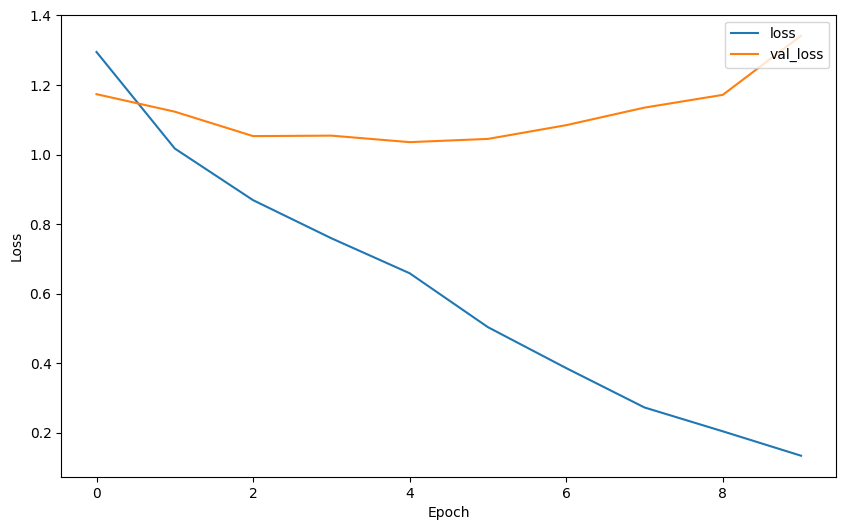

In [26]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

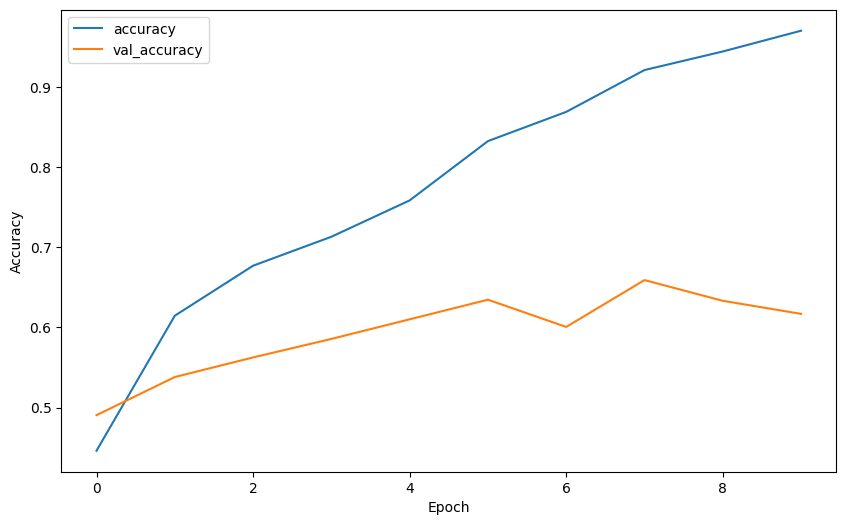

In [27]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [30]:
model.evaluate(train_data_gen)

92/92 [==============================] - 7s 77ms/step - loss: 0.1075 - accuracy: 0.9761


[0.10748732089996338, 0.9761418104171753]

In [31]:
model.save('flower_model.h5')

In [45]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flower_model.h5')

# Tahmin edilecek 5 çiçek dosyasının dosya yollarını belirtin
flower_files = ["C:\\Users\\W10\Desktop\\Yeni klasör\\flower_photos\\papatya-resmi.webp"]

# Her bir çiçek dosyası için tahmin yapın
for file in flower_files:
    # Yeni görüntüyü açın ve uygun bir formata dönüştürün
    image = Image.open(file)
    image = image.resize((120, 120))
    image_array = np.array(image.convert('RGB')) / 255.0
    image_array = np.expand_dims(image_array,axis= 0)

    class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Tahmin yapın
prediction = model.predict(image_array)
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]

print('Tahmin edilen sınıf:', predicted_class)



1/1 [==============================] - 0s 65ms/step
Tahmin edilen sınıf: daisy


In [46]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flower_model.h5')

# Tahmin edilecek 5 çiçek dosyasının dosya yollarını belirtin
flower_files = ["C:\\Users\\W10\Desktop\\Yeni klasör\\flower_photos\\lale-resmi.jpg"]

# Her bir çiçek dosyası için tahmin yapın
for file in flower_files:
    # Yeni görüntüyü açın ve uygun bir formata dönüştürün
    image = Image.open(file)
    image = image.resize((120, 120))
    image_array = np.array(image.convert('RGB')) / 255.0
    image_array = np.expand_dims(image_array,axis= 0)

    class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Tahmin yapın
prediction = model.predict(image_array)
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]

print('Tahmin edilen sınıf:', predicted_class)

1/1 [==============================] - 0s 68ms/step
Tahmin edilen sınıf: tulips
